In [69]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
import pandas as pd

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [70]:
# Load the dataset
data = pd.read_csv('d:/DATA SCIENCE/MSDS 501/PAPER/DATASETS/Crime_Data_from_2020_to_Present_metadataupdated_nov11.csv')
data


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 0:00,01/08/2020 0:00,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 0:00,01/01/2020 0:00,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 0:00,01/01/2020 0:00,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 0:00,01/01/2020 0:00,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834315,231604807,01/27/2023 12:00:00 AM,01/26/2023,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
834316,231606525,03/22/2023 12:00:00 AM,03/22/2023,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
834317,231210064,04/12/2023 0:00,04/12/2023 0:00,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
834318,230115220,07/02/2023 0:00,07/01/2023 0:00,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


In [71]:
# Data preprocessing and feature selection
# Make sure to handle missing values, encode categorical variables, and select relevant features


In [72]:
# Explore the data
print(data.head())
print(data['Crm Cd'].value_counts())  # Check the distribution of crime types
print(data['AREA'].value_counts())    # Check the distribution of areas
print(data['DATE OCC'].min(), data['DATE OCC'].max())  # Check the time range of the dataset


       DR_NO               Date Rptd         DATE OCC  TIME OCC  AREA  \
0   10304468         01/08/2020 0:00  01/08/2020 0:00      2230     3   
1  190101086         01/02/2020 0:00  01/01/2020 0:00       330     1   
2  200110444  04/14/2020 12:00:00 AM       02/13/2020      1200     1   
3  191501505         01/01/2020 0:00  01/01/2020 0:00      1730    15   
4  191921269         01/01/2020 0:00  01/01/2020 0:00       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     

In [75]:
# Handle Date Features
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], format="%m/%d/%Y", errors='coerce')


In [76]:
# Filter data for the year 2023
data_2023 = data[data['DATE OCC'].dt.year == 2023]

In [77]:
# Example: Assuming 'feature1', 'feature2', ..., 'featureN' are your features, and 'target' is the target variable
features = data[['DATE OCC', 'AREA', 'Crm Cd']]
target = data['Crm Cd']

In [78]:
# Check for missing values in the feature dataset
print(features.isnull().sum())

DATE OCC    343238
AREA             0
Crm Cd           0
dtype: int64


In [79]:
# Check for missing values in the target dataset
print(target.isnull().sum())

0


In [80]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Date Rptd', 'AREA NAME', 'Crm Cd Desc', 'Mocodes', 'Vict Sex',
       'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status', 'Status Desc',
       'LOCATION', 'Cross Street'],
      dtype='object')

In [81]:
# Feature selection using correlation analysis

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Compute the correlation matrix for numeric columns
correlation_matrix = data[numeric_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                   DR_NO  TIME OCC      AREA  Rpt Dist No  Part 1-2    Crm Cd  \
DR_NO           1.000000 -0.016644  0.043969     0.044277  0.001201 -0.025614   
TIME OCC       -0.016644  1.000000  0.000330     0.000431 -0.053387  0.016755   
AREA            0.043969  0.000330  1.000000     0.999047  0.010500  0.000268   
Rpt Dist No     0.044277  0.000431  0.999047     1.000000  0.010375  0.000173   
Part 1-2        0.001201 -0.053387  0.010500     0.010375  1.000000  0.700389   
Crm Cd         -0.025614  0.016755  0.000268     0.000173  0.700389  1.000000   
Vict Age       -0.012037 -0.034649  0.016277     0.016242  0.199081 -0.010323   
Premis Cd       0.041583 -0.064036  0.002194     0.002140  0.268889  0.104157   
Weapon Used Cd  0.008372 -0.004833 -0.018207    -0.017864  0.434865  0.371901   
Crm Cd 1       -0.025580  0.016770  0.000065    -0.000031  0.700904  0.999286   
Crm Cd 2        0.026367  0.005321 -0.036341    -0.036719  0.076155  0.001306   
Crm Cd 3

In [82]:
# Identify highly correlated features and drop them
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

# Drop highly correlated features from the original dataset
data = data.drop(high_corr_features, axis=1)

In [83]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [84]:
# Identify numeric columns
numeric_columns = X_train.select_dtypes(include=['number']).columns

In [85]:
# SelectKBest for univariate feature selection

from sklearn.feature_selection import SelectKBest, f_classif

# Select top k features based on ANOVA F-statistic
k_best = min(10, len(numeric_columns))  # Adjust the number of features as needed
selector = SelectKBest(f_classif, k=k_best)


In [86]:
# Fit and transform the feature matrix (using only numeric features)
X_train_selected = selector.fit_transform(X_train[numeric_columns], y_train)
X_test_selected = selector.transform(X_test[numeric_columns])


c:\Users\Jessica\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [87]:
# Print the selected feature indices
selected_feature_indices = selector.get_support(indices=True)
print("Selected Feature Indices:", selected_feature_indices)

Selected Feature Indices: [0 1]


In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [89]:
# Train a classifier (e.g., Logistic Regression) on the selected features
#model = LogisticRegression()
model = LogisticRegression(max_iter=1000)  # Adjust the number of iterations as needed
model.fit(X_train_selected, y_train)

c:\Users\Jessica\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [90]:
# Make predictions on the test set
predictions = model.predict(X_test_selected)

In [91]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy on Test Set: {accuracy}')

Accuracy on Test Set: 0.15503044395435803


In [92]:
# Create confusion matrix (testing)
cm = confusion_matrix(y_test, predictions)

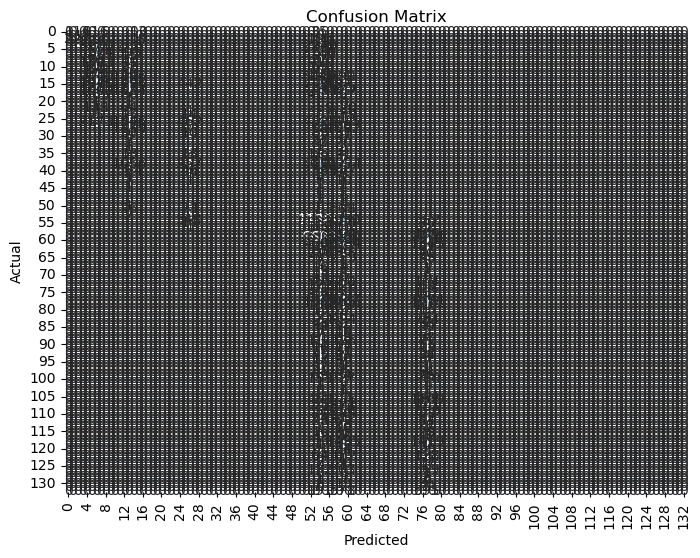

In [93]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [94]:
# Plot the decision boundary if your dataset has 2 features
if X_train.shape[1] == 2:
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


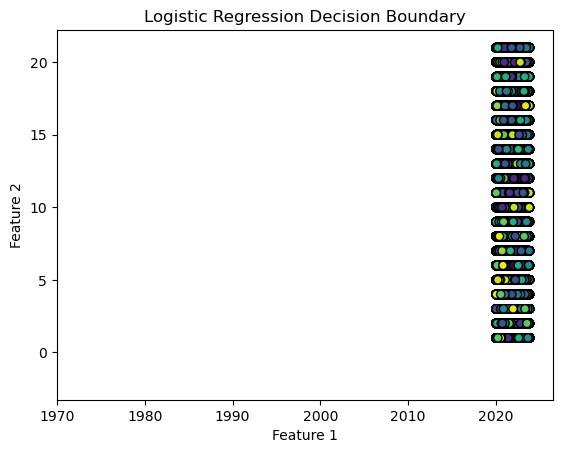

In [95]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='viridis', edgecolors='k')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [96]:
# Evaluating model performance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)

c:\Users\Jessica\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.15503044395435803
Precision: 0.07365693970863145
Recall: 0.15503044395435803
F1 Score: 0.08665117995370605
Confusion Matrix:
[[  0   0 116 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 [  0   0 227 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
